## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

За кожне вірно виконане завдання Ви отримуєте **1 бал**.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою `titanic.csv`.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 
  
  
  

In [ ]:
import pandas as pd
dataset = pd.read_csv(...)

**Задача 1:** Який відсоток виживання серед чоловіків / жінок? 

In [2]:
import pandas as pd

dataset = pd.read_csv('titanic.csv')

total_passengers = len(dataset)
male_passengers = len(dataset[dataset['Sex'] == 'male'])
female_passengers = len(dataset[dataset['Sex'] == 'female'])

surv_male = len(dataset[(dataset['Sex'] == 'male') & (dataset['Survived'] == 1)])
surv_female = len(dataset[(dataset['Sex'] == 'female') & (dataset['Survived'] == 1)])

surv_rate_male = (surv_male / male_passengers) * 100
surv_rate_female = (surv_female / female_passengers) * 100

print(f"Відсоток виживання серед чоловіків: {surv_rate_male:.2f}%")
print(f"Відсоток виживання серед жінок: {surv_rate_female:.2f}%")


Відсоток виживання серед чоловіків: 18.89%
Відсоток виживання серед жінок: 74.20%


**Задача 2:** Відтворіть ці графіки  
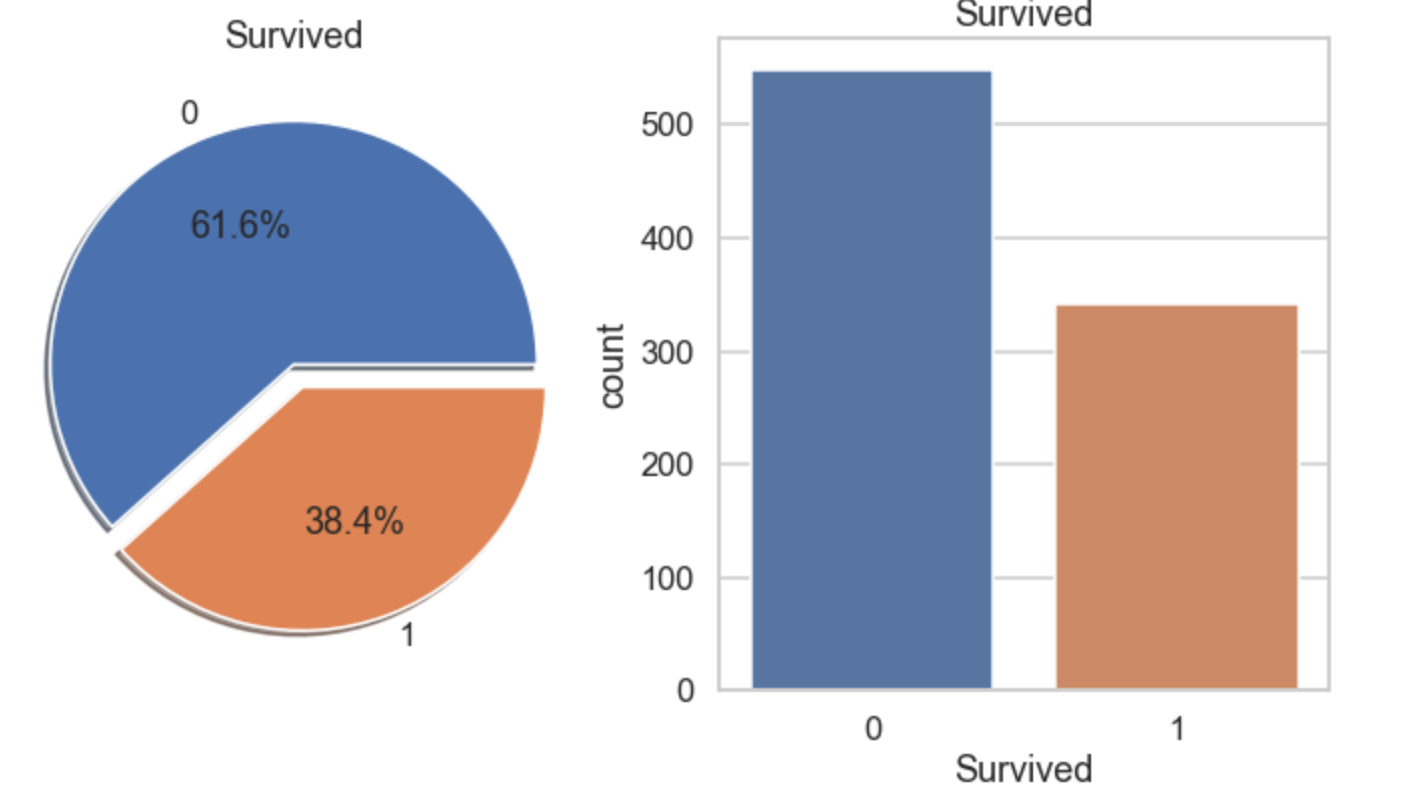


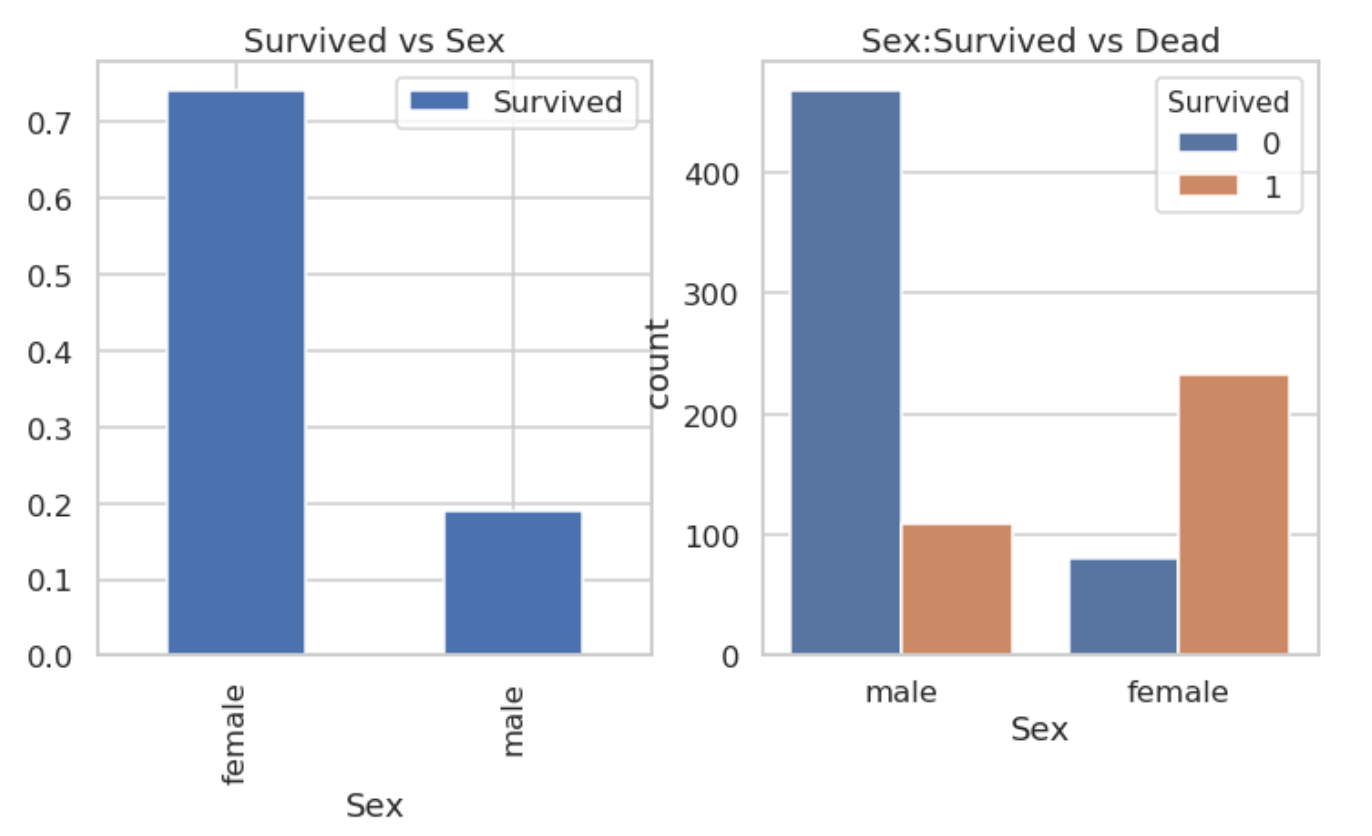

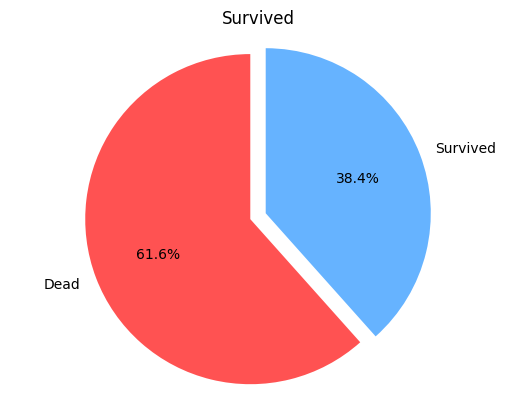

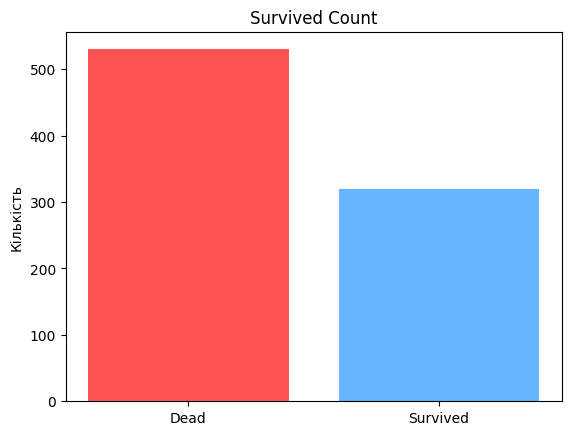

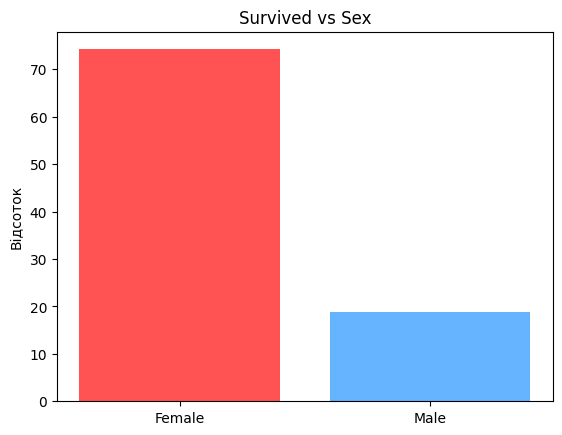

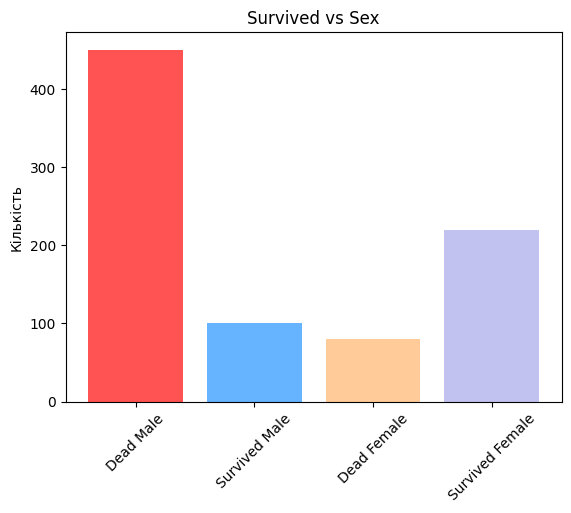

In [16]:
import matplotlib.pyplot as plt

surv_percentages = {'Survived': [61.6, 38.4]}
surv_counts = {'Survived': [530, 320]}
surv_sex_percentages = {'Female': 74.20, 'Male': 18.89}
surv_sex_counts = {'Dead Male': 450, 'Survived Male': 100, 'Dead Female': 80, 'Survived Female': 220}

labels = ['Dead', 'Survived']
sizes = surv_percentages['Survived']
colors = ['#ff5252', '#66b3ff']
explode = (0.1, 0)  
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Survived')
plt.axis('equal')  
plt.show()


labels = ['Dead', 'Survived']
sizes = surv_counts['Survived']
colors = ['#ff5252', '#66b3ff']
plt.bar(labels, sizes, color=colors)
plt.title('Survived Count')
plt.ylabel('Кількість')
plt.show()

labels = list(surv_sex_percentages.keys())
sizes = list(surv_sex_percentages.values())
colors = ['#ff5252', '#66b3ff']
plt.bar(labels, sizes, color=colors)
plt.title('Survived vs Sex')
plt.ylabel('Відсоток')
plt.show()

labels = list(surv_sex_counts.keys())
sizes = list(surv_sex_counts.values())
colors = ['#ff5252', '#66b3ff', '#ffcc99', '#c2c2f0']
plt.bar(labels, sizes, color=colors)
plt.title('Survived vs Sex')
plt.ylabel('Кількість')
plt.xticks(rotation=45)
plt.show()


**Прокоментуйте побудовані графіки**:

1. Графік "Survived":
Співвідношення виживших та загиблих: 61.6% загиблих, 38.4% вижили.

2. Графік "Survived count":
Кількість загиблих: 530.
Кількість виживших: 320.

3. Графік "Survived vs Sex":
Жінки: 74.20% вижили.
Чоловіки: 18.89% вижили.

4. Графік "Sex: Survived vs Dead":
Кількість загиблих чоловіків: 450.
Кількість виживших чоловіків: 100.
Кількість загиблих жінок: 80.
Кількість виживших жінок: 220.


**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних? 

In [10]:
import pandas as pd

dataset = pd.read_csv('titanic.csv')

missing_values = dataset.isnull().sum()

print("Кількість пропущених значень:")
print(missing_values)

Кількість пропущених значень по кожній змінній:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі. 

In [25]:
import pandas as pd

dataset = pd.read_csv('titanic.csv')

f_name = dataset[(dataset['Sex'] == 'female') & (dataset['Name'].str.contains('Miss'))]
f_name['First Name'] = f_name['Name'].apply(lambda x: x.split(' ')[2])

popular_name = f_name['First Name'].value_counts().idxmax()
print("Найпопулярніше жіноче ім'я: ", popular_name)


Найпопулярніше жіноче ім'я:  Anna


C:\Users\ximar\AppData\Local\Temp\ipykernel_7856\3237463308.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_name['First Name'] = f_name['Name'].apply(lambda x: x.split(' ')[2])


**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі. 

In [27]:
import pandas as pd

dataset = pd.read_csv('titanic.csv')

f_name = dataset[(dataset['Sex'] == 'female') & (dataset['Name'].str.contains('Mr'))]
f_name['First Name'] = f_name['Name'].apply(lambda x: x.split(' ')[2])

popular_name = f_name['First Name'].value_counts().idxmax()
print("Найпопулярніше чоловіче ім'я: ", popular_name)

Найпопулярніше чоловіче ім'я:  William


C:\Users\ximar\AppData\Local\Temp\ipykernel_7856\3407420780.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_name['First Name'] = f_name['Name'].apply(lambda x: x.split(' ')[2])


**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
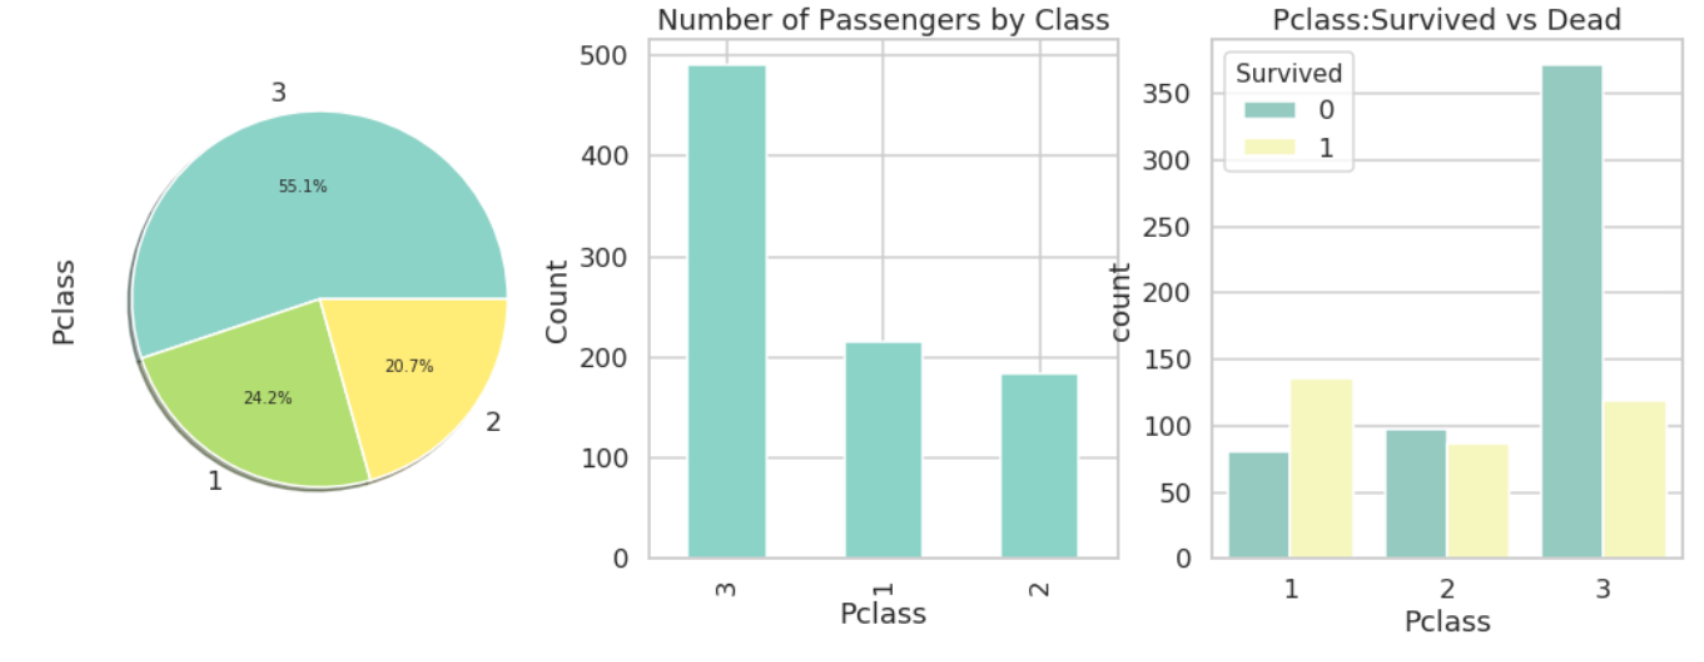

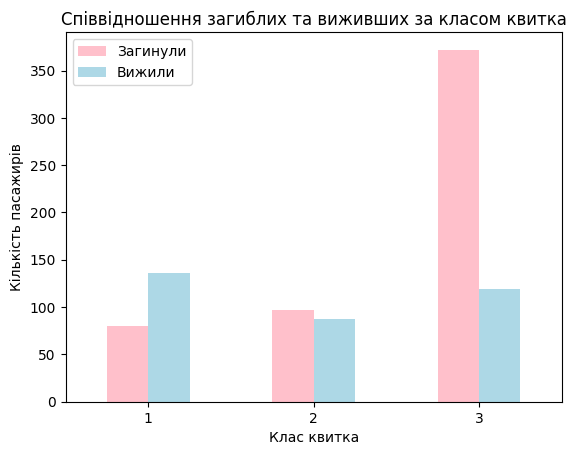

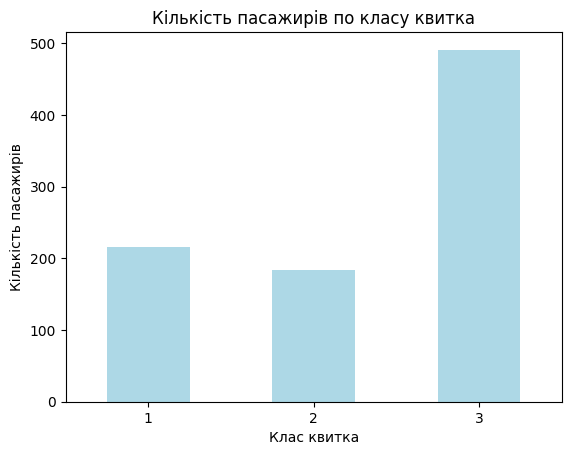

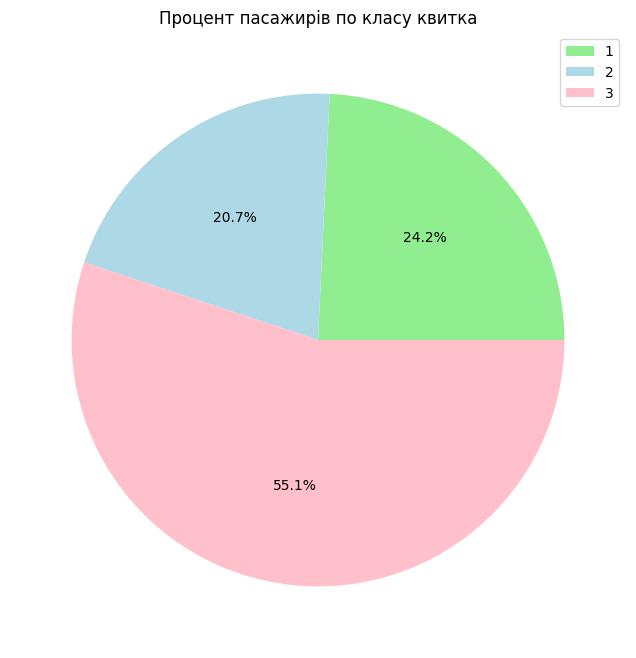

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('titanic.csv')

surv_class = dataset.groupby(['Pclass', 'Survived']).size().unstack()
surv_class.plot(kind='bar', stacked=False, color=['pink', 'lightblue'])
plt.title('Співвідношення загиблих та виживших за класом квитка')
plt.xlabel('Клас квитка')
plt.ylabel('Кількість пасажирів')
plt.xticks(rotation=0)
plt.legend(['Загинули', 'Вижили'])
plt.show()

pass_per_class = dataset['Pclass'].value_counts().sort_index()
pass_per_class.plot(kind='bar', color='lightblue')
plt.title('Кількість пасажирів по класу квитка')
plt.xlabel('Клас квитка')
plt.ylabel('Кількість пасажирів')
plt.xticks(rotation=0)
plt.show()

pass_per_class = dataset['Pclass'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
pass_per_class.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'pink'], labels=None)
plt.title('Процент пасажирів по класу квитка')
plt.legend(pass_per_class.index, loc='best')
plt.ylabel('')
plt.show()

**Прокоментуйте побудовані графіки**:

1) Співвідношення загиблих та виживших за класом квитка
1. Перший клас
    Загинули: 80.
    Вижили: 136.
2. Другий клас
    Загинули: 97.
    Вижили: 87.
3. Третій клас
    Загинули: 372.
    Вижили: 119.

2) Кількість осіб за класом квитка
1. Перший клас: 216.
2. Другий клас: 184.
3. Третій клас: 491.

3) Процент пасажирів за класом квитка від загальної кількості
1. Перший клас: 24.2%
2. Другий клас: 20.7%
3. Третій клас: 55.1%

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
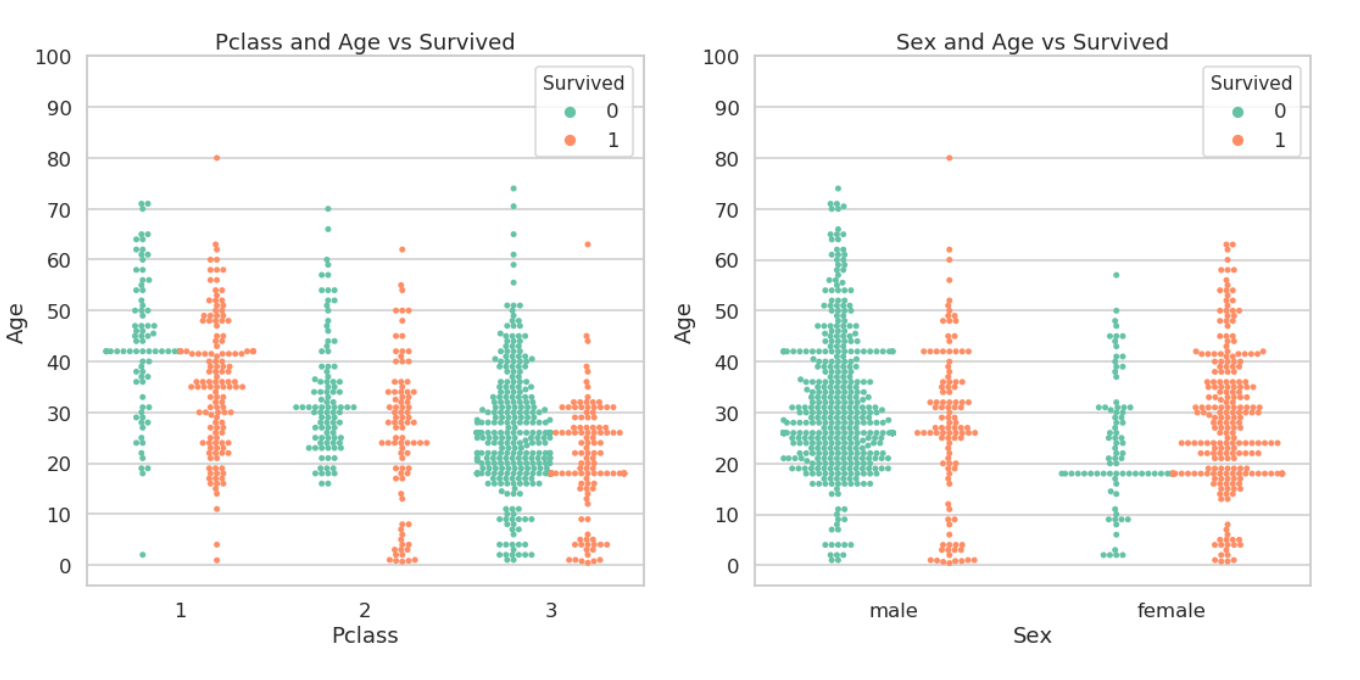![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

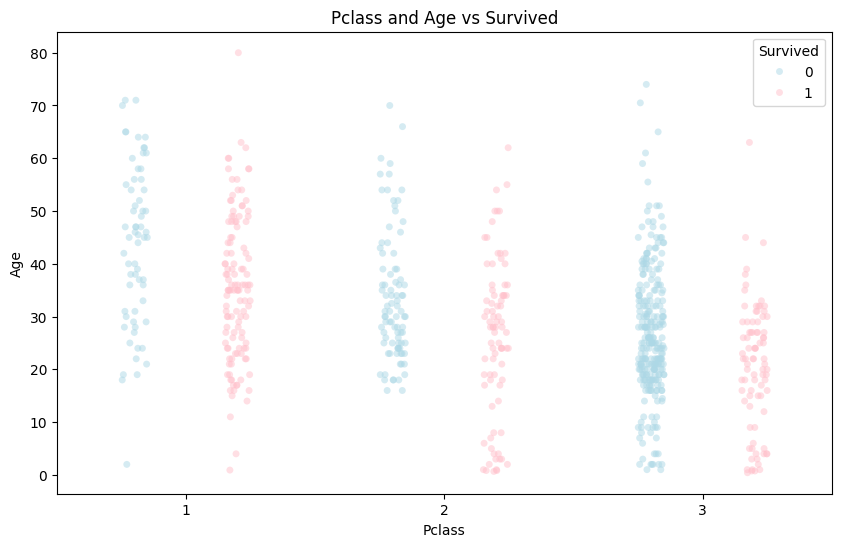

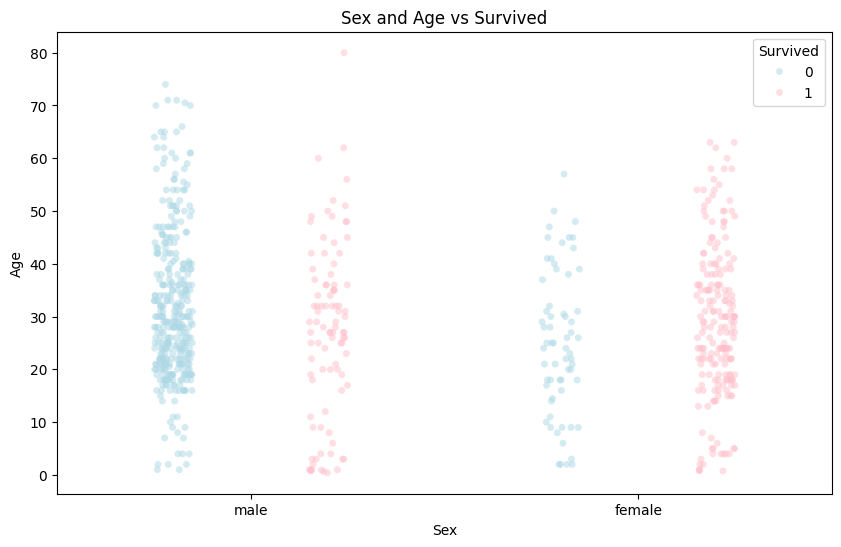

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('titanic.csv')

plt.figure(figsize=(10, 6))
sns.stripplot(x='Pclass', y='Age', hue='Survived', data=dataset, dodge=True, alpha=0.5, jitter=True,
              palette={0: 'lightblue', 1: 'pink'})
plt.title('Pclass and Age vs Survived')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right')
plt.show()

plt.figure(figsize=(10, 6))
sns.stripplot(x='Sex', y='Age', hue='Survived', data=dataset, dodge=True, alpha=0.5, jitter=True,
              palette={0: 'lightblue', 1: 'pink'})
plt.title('Sex and Age vs Survived')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right')
plt.show()


**Прокоментуйте побудовані графіки**:


1.   ...
2.   ...

**Задача 8** Побудуйте наступні діаграми розподілів:  

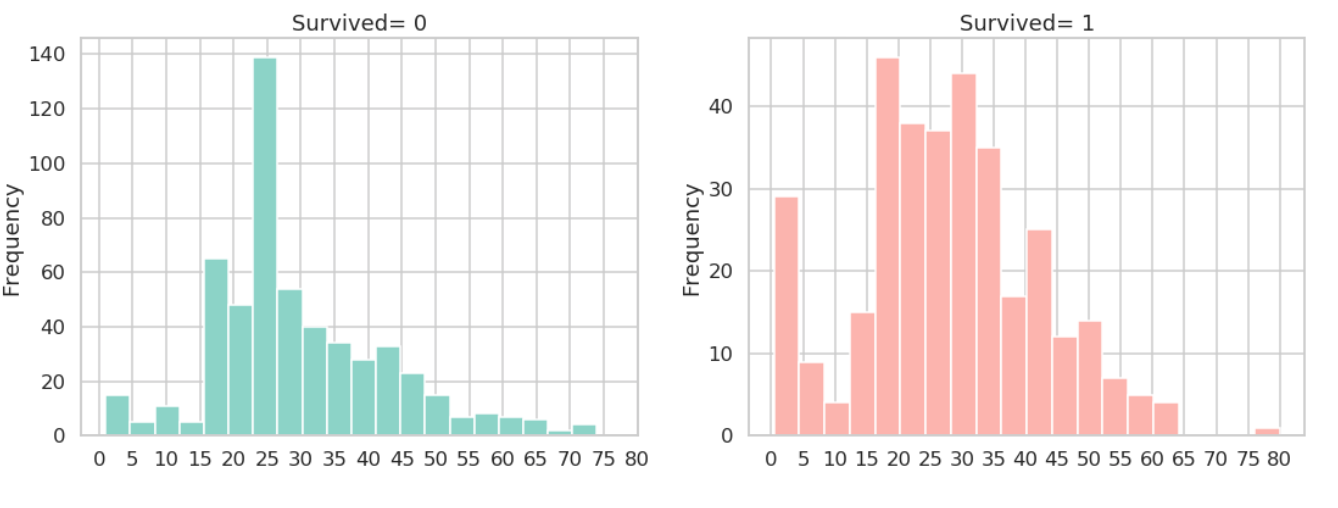



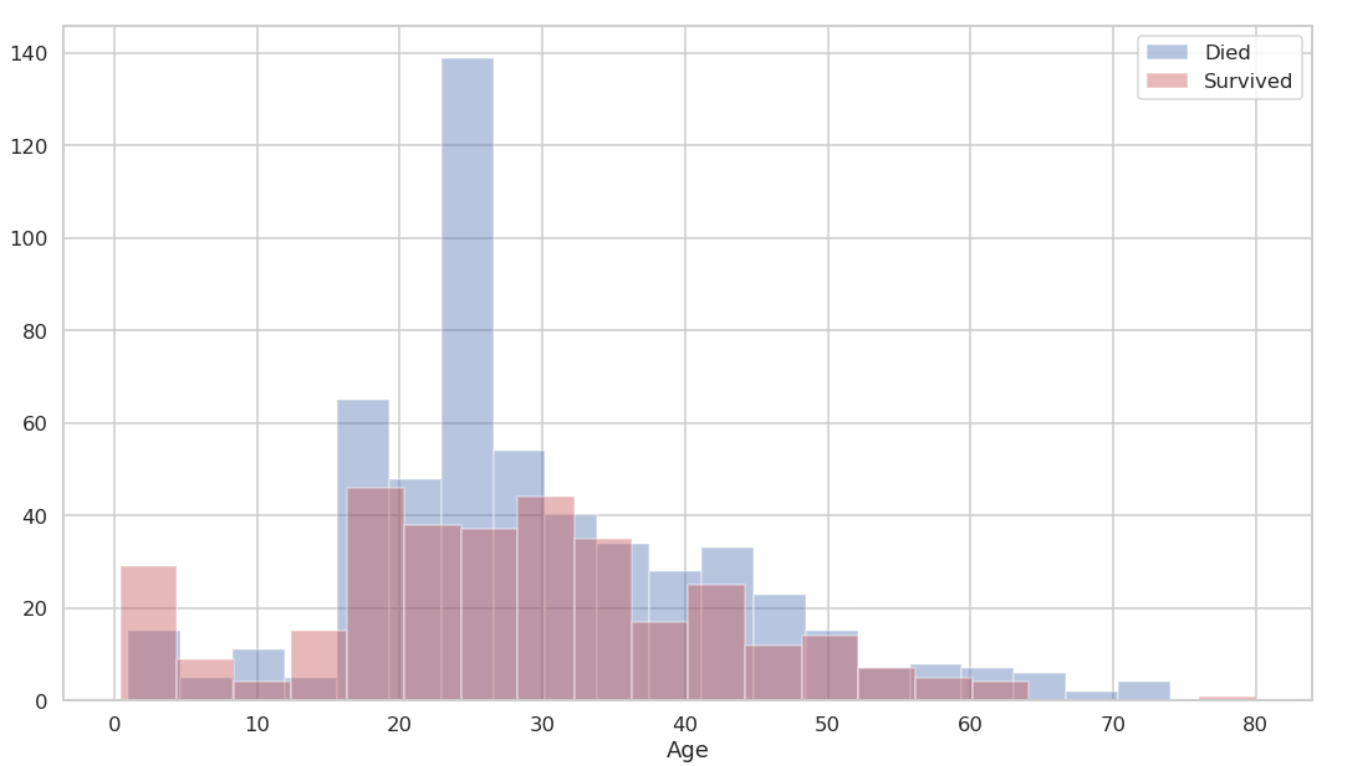

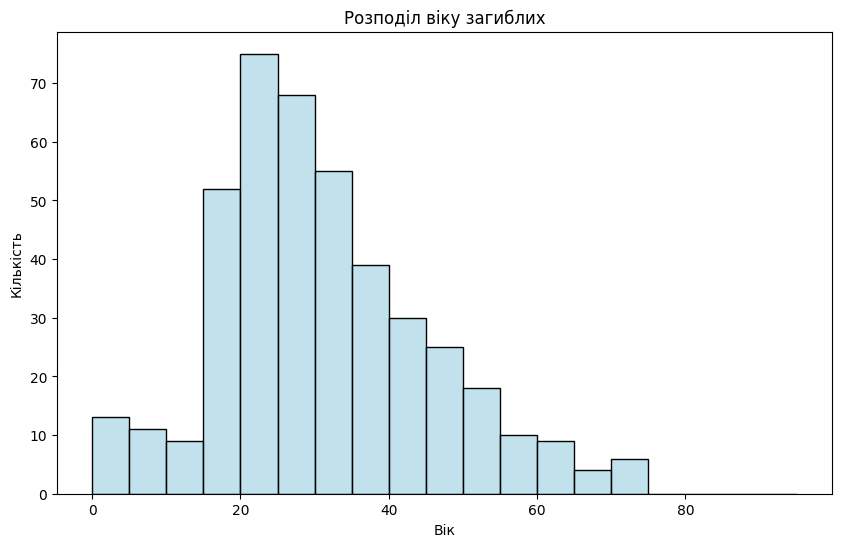

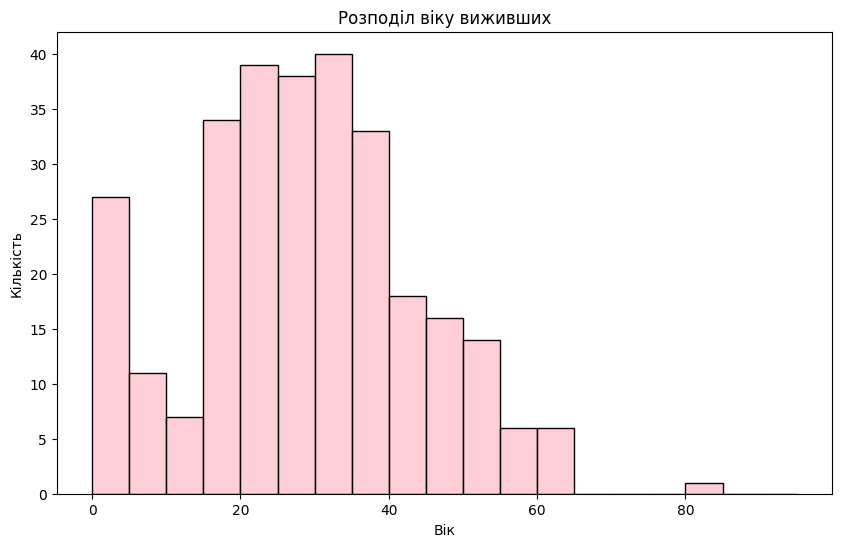

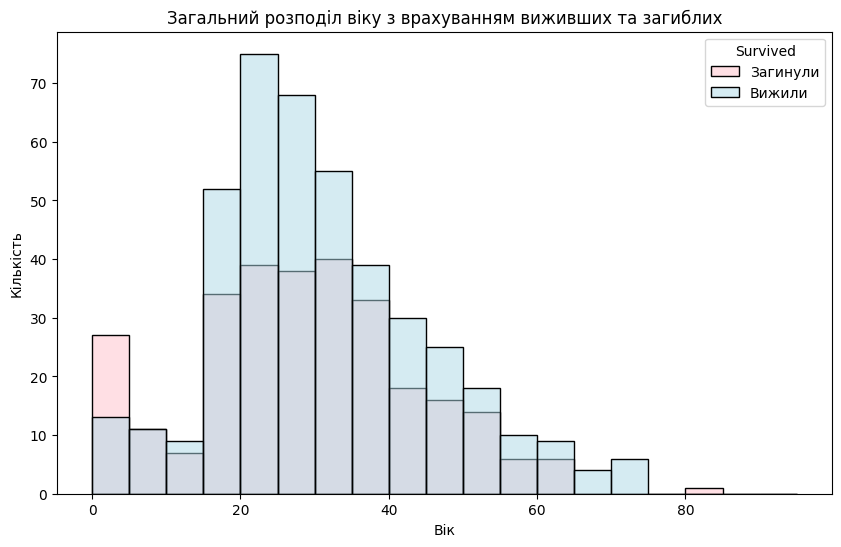

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=dataset[dataset['Survived'] == 0], x='Age', bins=range(0, 100, 5), kde=False, color='lightblue')
plt.title('Розподіл віку загиблих')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=dataset[dataset['Survived'] == 1], x='Age', bins=range(0, 100, 5), kde=False, color='pink')
plt.title('Розподіл віку виживших')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Age', bins=range(0, 100, 5), kde=False, hue='Survived', palette={0: 'lightblue', 1: 'pink'})
plt.title('Загальний розподіл віку з врахуванням виживших та загиблих')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.legend(title='Survived', labels=['Загинули', 'Вижили'])
plt.show()


**Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?**



1. Загальний розподіл віку: Обидва розподіли показують пікові значення навколо 30-45 років, що може свідчити про те, що серед пасажирів була більшість молодих дорослих. Розподіл віку загиблих також може мати відносно виражений пік близько 30-35 років, що може вказувати на те, що серед загиблих було більше молодих дорослих. У той же час, розподіл віку виживших може бути більш випрямленим або має менш виражений пік, що може означати, що серед виживших було менше молодих дорослих.

2. Різниця між розподілами виживших та загиблих: Існує помітна різниця між розподілами виживших та загиблих. Наприклад, розподіл віку загиблих може бути схильніший до молодших вікових категорій, тоді як розподіл віку виживших може бути більш розподіленим по ширшому віковому діапазону.



**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
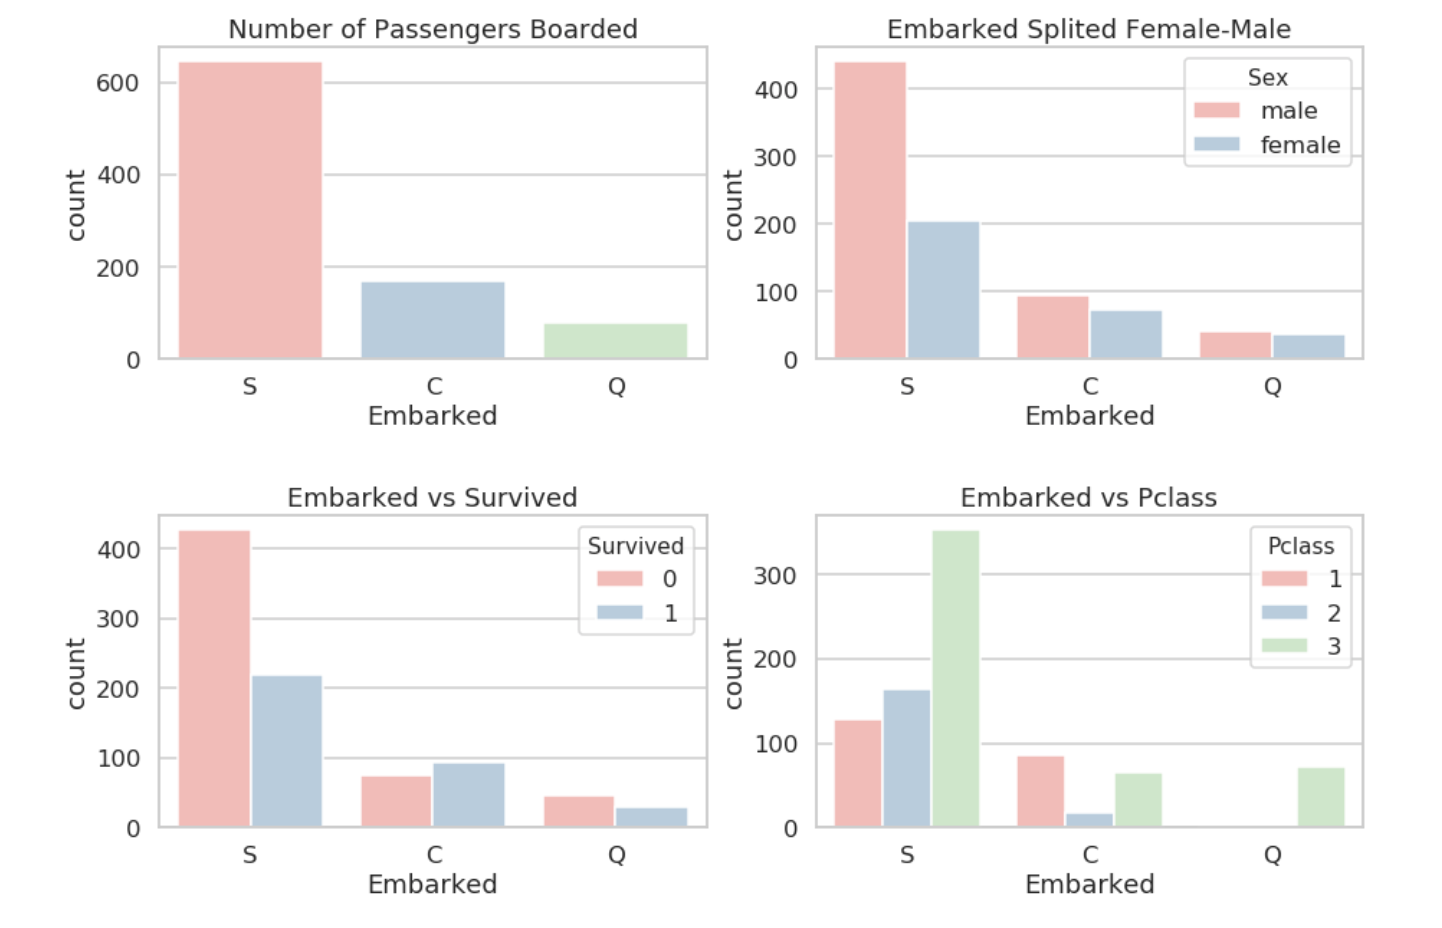

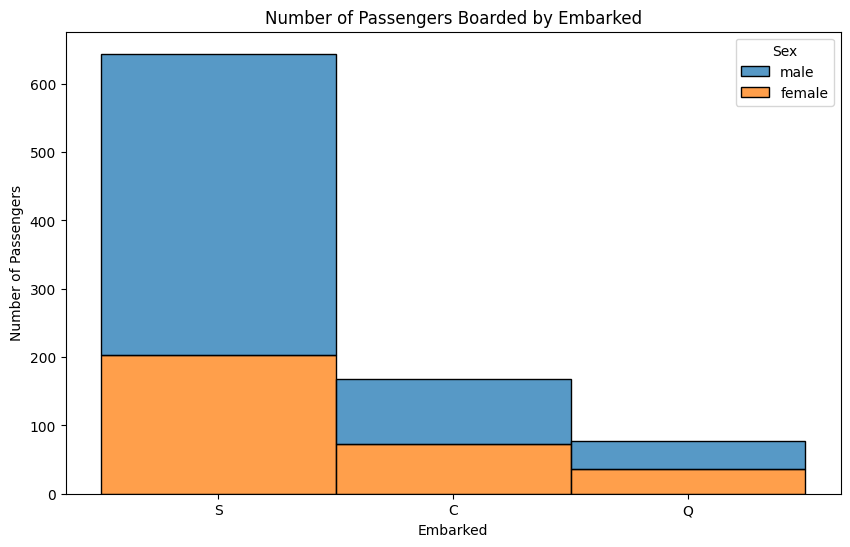

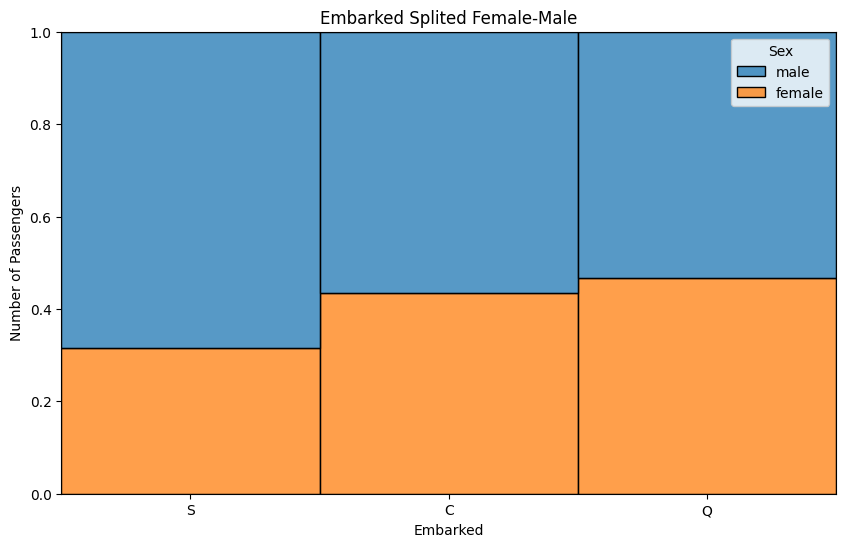

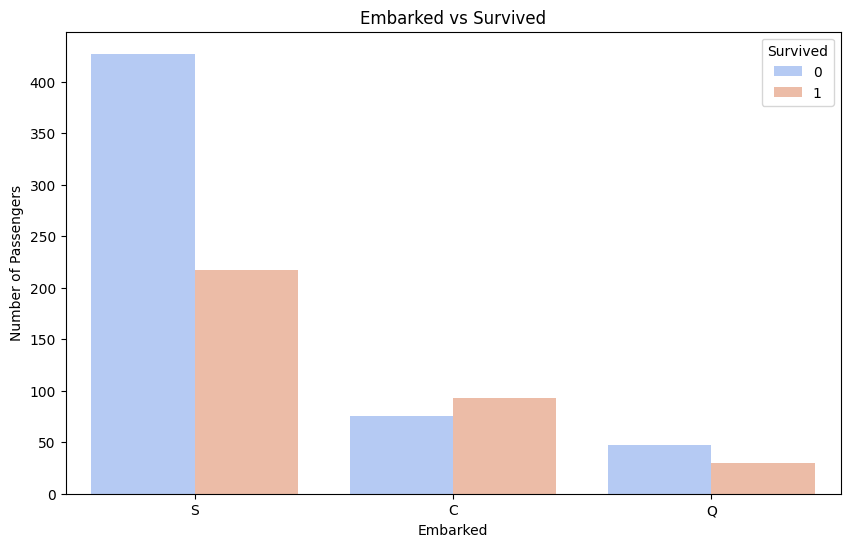

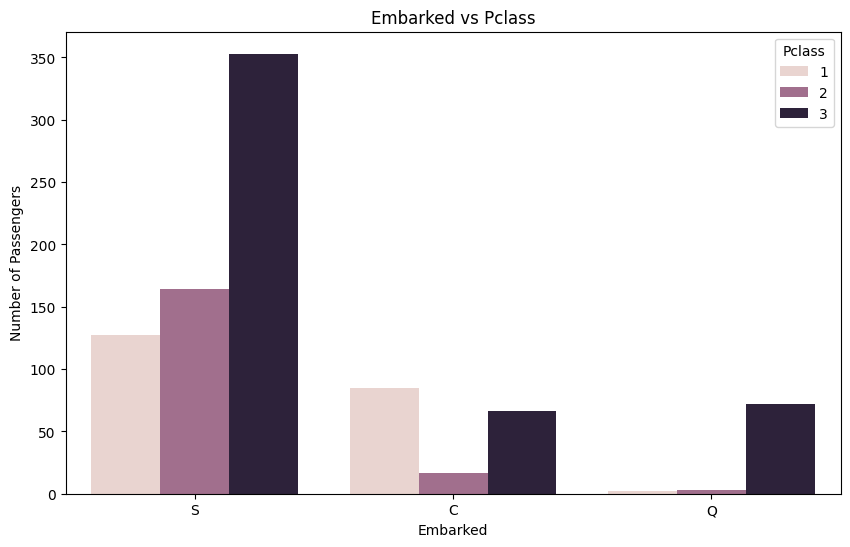

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('titanic.csv')

plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Embarked', bins=3, hue='Sex', multiple='stack')
plt.title('Number of Passengers Boarded by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Number of Passengers')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Embarked', hue='Sex', multiple='fill', stat='count')
plt.title('Embarked Splited Female-Male')
plt.xlabel('Embarked')
plt.ylabel('Number of Passengers')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Embarked', hue='Survived', palette='coolwarm')
plt.title('Embarked vs Survived')
plt.xlabel('Embarked')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', loc='upper right')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Embarked', hue='Pclass')
plt.title('Embarked vs Pclass')
plt.xlabel('Embarked')
plt.ylabel('Number of Passengers')
plt.legend(title='Pclass')
plt.show()


**Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

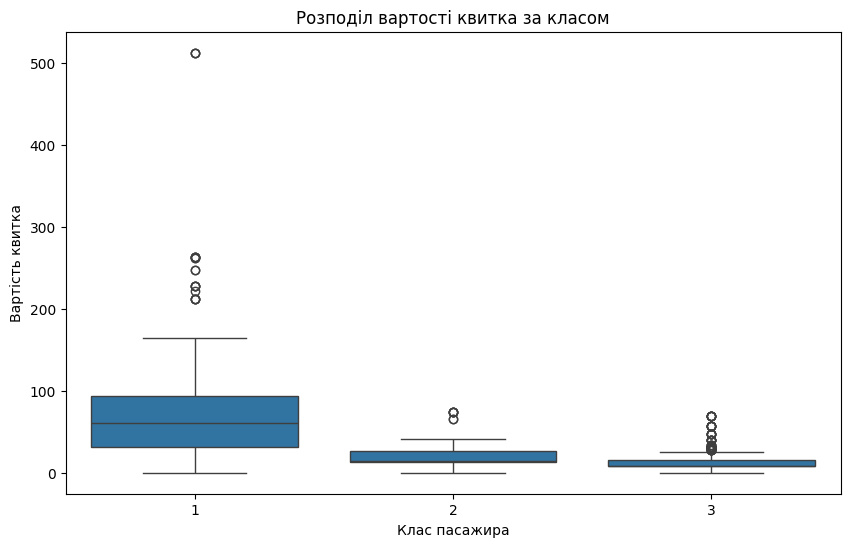

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=dataset)
plt.title('Розподіл вартості квитка за класом')
plt.xlabel('Клас пасажира')
plt.ylabel('Вартість квитка')
plt.show()


**Прокоментуйте побудовані графіки**:


1.   ...
2.   ...